<a href="https://colab.research.google.com/github/krishbhowmick/Million-Song-Dataset-Analysis-using-PySpark/blob/main/PySpark2.11_Million_Song_Dataset_Analysis_using_PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GroupBy function** most important

**Query #1:** Find all of the records of those users who have listened to **Rihanna**

**Query #2:** Find top 10 users who are fan of **Rihanna**

**Query #3:** Find top 10 famous **tracks** 

**Query #4:** Find top 10 famous **tracks of Rihanna**

**Query #5:** Find top 10 famous **albums** 

**Query #6:** find top 10 users who are fan of ***pop*** music

**Query #7:** Find top 10 famous **genres**

**Query #7.1:** Find top 10 famous **artist**

**Query #8:** Find out each user favourite **genre**

**Query #9:** Find out how many **pop,rock,metal and hip hop** singers we have and then visulize it using bar chart

In [ ]:
!pwd
!ls
!python --version 

/content
sample_data
Python 3.6.9


In [ ]:
!wget https://mirrors.estointernet.in/apache/spark/spark-3.0.1/spark-3.0.1-bin-hadoop3.2.tgz
!tar -xvzf spark-3.0.1-bin-hadoop3.2.tgz
!ls /content/spark-3.0.1-bin-hadoop3.2
!pip install findspark
!pip install -U pyarrow


--2021-01-07 23:54:02--  https://mirrors.estointernet.in/apache/spark/spark-3.0.1/spark-3.0.1-bin-hadoop3.2.tgz
Resolving mirrors.estointernet.in (mirrors.estointernet.in)... 43.255.166.254, 2403:8940:3:1::f
Connecting to mirrors.estointernet.in (mirrors.estointernet.in)|43.255.166.254|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224062525 (214M) [application/octet-stream]
Saving to: ‘spark-3.0.1-bin-hadoop3.2.tgz’

spark-3.0.1-bin-had 100%[===================>] 213.68M  11.6MB/s    in 20s     

2021-01-07 23:54:24 (10.7 MB/s) - ‘spark-3.0.1-bin-hadoop3.2.tgz’ saved [224062525/224062525]

spark-3.0.1-bin-hadoop3.2/
spark-3.0.1-bin-hadoop3.2/RELEASE
spark-3.0.1-bin-hadoop3.2/examples/
spark-3.0.1-bin-hadoop3.2/examples/src/
spark-3.0.1-bin-hadoop3.2/examples/src/main/
spark-3.0.1-bin-hadoop3.2/examples/src/main/scala/
spark-3.0.1-bin-hadoop3.2/examples/src/main/scala/org/
spark-3.0.1-bin-hadoop3.2/examples/src/main/scala/org/apache/
spark-3.0.1-bin-hadoop3.2

In [ ]:
import os
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop3.2"
import findspark
findspark.init()

In [ ]:
# Connect the google drive with google Colab

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max ,struct
import matplotlib.pyplot as plts

spark = SparkSession.builder.appName("Create DataFrame from Nested JSON File in PySpark 3.0").getOrCreate()
print(spark.sparkContext.appName)

Create DataFrame from Nested JSON File in PySpark 3.0


In [ ]:
path = '/content/drive/My Drive/ML_Code/MTE8_PySpark/listenings.csv'
dataframe = spark.read.csv(path, header=True, inferSchema=True)

#path1 = '/content/drive/MyDrive/ML_Code/MTE8_PySpark/genre.csv'
#genre_df = spark.read.csv(path1, header=True, inferSchema=True)

In [ ]:
dataframe.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- date: long (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



In [ ]:
dataframe.show(5)

+-----------+-------------+--------------------+---------+-----------------+
|    user_id|         date|               track|   artist|            album|
+-----------+-------------+--------------------+---------+-----------------+
|000Silenced|1299680100000|           Price Tag| Jessie J|      Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...| Jessie J|        Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|    Robyn|         Be Mine!|
|000Silenced|1299679200000|            Acapella|    Kelis|         Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|The Tease|I'm Not Invisible|
+-----------+-------------+--------------------+---------+-----------------+
only showing top 5 rows



In [ ]:
dataframe.count()

14650594

In [ ]:
dataframe1= dataframe.drop('date')

In [ ]:
dataframe1.show(5)

+-----------+--------------------+---------+-----------------+
|    user_id|               track|   artist|            album|
+-----------+--------------------+---------+-----------------+
|000Silenced|           Price Tag| Jessie J|      Who You Are|
|000Silenced|Price Tag (Acoust...| Jessie J|        Price Tag|
|000Silenced|Be Mine! (Ballad ...|    Robyn|         Be Mine!|
|000Silenced|            Acapella|    Kelis|         Acapella|
|000Silenced|   I'm Not Invisible|The Tease|I'm Not Invisible|
+-----------+--------------------+---------+-----------------+
only showing top 5 rows



In [ ]:
# Drop all the null values

df = dataframe1.na.drop()

In [ ]:
df.count()

13758905

**Query #1:** Find all of the records of those users who have listened to **Rihanna**


In [ ]:
q1 = df.select('*').filter(df.artist == 'Rihanna').show()

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
|      0rdos|There's a Thug in...|Rihanna|    Music of the Sun|
|      0rdos|                Rush|Rihanna|    Music of the Sun|
|      0rdos|              Let Me|Rihann

**Query #2:** Find top 10 users who are fan of **Rihanna**



In [ ]:
Q2 = df.select('*').filter(df.artist=='Rihanna').groupby('user_id').agg(count('user_id').alias('count')).orderBy(desc('count')).limit(10).show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        thiessu|  179|
|    eyessetkyle|  166|
|           adxx|  164|
|missnumberthree|  156|
|helloiamnatalie|  128|
|          nmjnb|  124|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|     mixedvibes|  120|
|       AndyKitt|  115|
+---------------+-----+



**Query #3:** Find top 10 famous **tracks** 



In [ ]:
#   'user_id','track','artist','album'
Q33=df.select('*').groupby('track').agg(count('track').alias('counttrack')).orderBy(desc('counttrack')).limit(10).show()

+-------+----------+
|  track|counttrack|
+-------+----------+
|  Intro|     13176|
|   Home|      7576|
|  Hello|      6961|
|Hold On|      5857|
|   Work|      4889|
|  Sorry|      4824|
|   Baby|      4646|
|Runaway|      4429|
| Closer|      4287|
|   Fire|      4141|
+-------+----------+



In [ ]:
q3 = df.select('artist','track').groupby('artist','track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10).show()

+--------------+-----------------+-----+
|        artist|            track|count|
+--------------+-----------------+-----+
| Justin Bieber|            Sorry| 3381|
|Arctic Monkeys| Do I Wanna Know?| 2865|
|      Bon Iver|      Skinny Love| 2836|
|          Zayn|       PILLOWTALK| 2701|
|   The Killers|    Mr Brightside| 2690|
|       Rihanna|             Work| 2646|
|      Bastille|          Pompeii| 2606|
|Mumford & Sons|  Little Lion Man| 2520|
|Mumford & Sons|         The Cave| 2485|
| Justin Bieber|What Do You Mean?| 2481|
+--------------+-----------------+-----+



**Query #4:** Find top 10 famous **tracks of Rihanna**



In [ ]:
Q4= df.select('*').filter(df.artist=='Rihanna').groupby('track').agg(count('track').alias('count_track')).orderBy(desc('count_track')).limit(10).show()

+--------------------+-----------+
|               track|count_track|
+--------------------+-----------+
|                Work|       2646|
|Only Girl (In the...|       1749|
|We Found Love (fe...|       1575|
|                 S&M|       1307|
|            Rude Boy|       1303|
|            Diamonds|       1224|
|      Kiss it Better|        945|
| Where Have You Been|        844|
|Cheers (Drink to ...|        697|
|           Desperado|        679|
+--------------------+-----------+



**Query #5:** Find top 10 famous **albums** 



In [ ]:
#   'user_id','track','artist','album'
Q5= df.select('*').groupby('album').agg(count('album').alias('count')).orderBy(desc('count')).show(10)

+--------------------+-----+
|               album|count|
+--------------------+-----+
|       Greatest Hits|67892|
|   The Life Of Pablo|22311|
|                  AM|14264|
|                  xx|14198|
|     An Awesome Wave|13673|
|        Sigh No More|13556|
|Whatever People S...|12731|
|            For Emma|11995|
|          Art Angels|11694|
|                  21|11576|
+--------------------+-----+
only showing top 10 rows



**Query #6:** find top 10 users who are fan of ***pop*** music



In [ ]:
path1 = '/content/drive/MyDrive/ML_Code/MTE8_PySpark/genre.csv'
genre_df = spark.read.csv(path1, header=True, inferSchema=True)
genre_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



In [ ]:
# Let's inner join these two data frames

data = df.join(genre_df, how ='inner', on=['artist'])
data.show()

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|       Ro

In [ ]:
# find top 10 users who are fan of pop music
Q6= data.select('*').filter(data.genre=='pop').groupby('user_id').agg(count('user_id').alias('user')).orderBy(desc('user')).limit(10).show()

+---------------+----+
|        user_id|user|
+---------------+----+
|        01Green| 496|
|      momousagi| 400|
|          mrpsb| 400|
|   BlueKnockOut| 378|
|    musicboy80s| 376|
|  incultojurgis| 374|
| ElektricOrchid| 370|
|foreign_fanatic| 350|
|   Kevin_Soutar| 346|
|  landrover2171| 301|
+---------------+----+



**Query #7:** Find top 10 famous **genres**



In [ ]:
Q77=data.select('*').groupby('genre').agg(count('genre').alias('count')).orderBy(desc('count')).show(10)

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+
only showing top 10 rows



**Query #7.1:** Find top 10 famous **artist**

In [ ]:
Q713= data.select('*').groupby('artist').agg(count('artist')).orderBy(desc('count(artist)')).limit(10).show()

+--------------+-------------+
|        artist|count(artist)|
+--------------+-------------+
|    Kanye West|       831345|
|        Eminem|       360945|
|       Beyoncé|       270450|
|       Rihanna|       207970|
|Kendrick Lamar|       185504|
|  David Guetta|       180570|
|         Drake|       161777|
|     Daft Punk|       141810|
|   Hans Zimmer|       127032|
| Justin Bieber|        98160|
+--------------+-------------+



**Query #7.2:** Find out each singer's favourite **album**

**Query #8:** Find out each user favourite **genre**



In [ ]:
# Find out each user favourite genre
Q88=data.select('user_id','genre').groupby('user_id','genre').agg(count('genre').alias('countgenre')).orderBy('user_id')
Q88.show()

+-------+--------------------+----------+
|user_id|               genre|countgenre|
+-------+--------------------+----------+
| --Seph|         folktronica|         2|
| --Seph|               Ruben|         4|
| --Seph|               indie|         3|
| --Seph| Sir Colin Davis ...|         1|
| --Seph|  progressive trance|         1|
| --Seph|               dance|         1|
| --Seph|   Alesso Feat Hurts|         1|
| --Seph|                soul|         1|
| --Seph|                folk|        10|
| --Seph| The Ambrosian Si...|         1|
| --Seph|          Nils Frahm|         1|
| --Seph| Tamás Vásáry & Y...|         1|
| --Seph|           indie pop|         1|
| --Seph|          electropop|         1|
| --Seph|   progressive house|         1|
| --Seph|     Jennifer Vyvyan|         1|
| --Seph|           classical|        31|
| --Seph|               house|         3|
| --Seph| Boston Pops Orch...|         1|
| --Seph|          Thom Yorke|         2|
+-------+--------------------+----

In [ ]:
Q881=Q88.groupby('user_id').agg(max(struct(col('genre'),col('countgenre'))).alias('max')).select(col('user_id'),col('max.genre'))
Q881.show()

+---------------+-----------------+
|        user_id|            genre|
+---------------+-----------------+
|        -Gemma-|             soul|
|        247flix|         synthpop|
|     A3sahaettr|     thrash metal|
|        AYFBlog|           trance|
|  AdamMcSpaddam|    southern rock|
|        Alukarl|           sludge|
|       Ambalina|           techno|
|        AndyEgg|     thrash metal|
| AngerisaGift14|             rock|
|      Anndddyyy|         trip hop|
|     BasilBrush|             soul|
|     BernieLick|     thrash metal|
|      Big_Tiger|             soul|
|          Birks|           techno|
|         BolaJA|       soundtrack|
|        Boone92|         synthpop|
|CameronWhittall|singer-songwriter|
|        Ceolmor|           techno|
| CheeseMonkey91|singer-songwriter|
|  Chilled-Lemon|         trip hop|
+---------------+-----------------+
only showing top 20 rows



**Query #9:** Find out how many **pop,rock,metal and hip hop** singers we have and then visulize it using bar chart

In [ ]:
Q9= data.select('genre').filter((col('genre') == 'pop') |(col('genre') == 'rock') |(col('genre') == 'metal') |(col('genre') == 'hip hop') )
Q9.show()

+-------+
|  genre|
+-------+
|    pop|
|    pop|
|    pop|
|    pop|
|hip hop|
|    pop|
|  metal|
|  metal|
|    pop|
|    pop|
|   rock|
|hip hop|
|hip hop|
|    pop|
|   rock|
|    pop|
|   rock|
|hip hop|
|hip hop|
|hip hop|
+-------+
only showing top 20 rows



In [ ]:
Q91= Q9.groupby('genre').agg(count('genre').alias('count_genre'))
Q91.show()

+-------+-----------+
|  genre|count_genre|
+-------+-----------+
|    pop|    1544747|
|hip hop|     532984|
|  metal|     208107|
|   rock|    2691934|
+-------+-----------+



In [ ]:
q9_list = Q91.collect()

In [ ]:

lables = [row['genre'] for row in q9_list]
counts = [row['count_genre'] for row in q9_list]


<BarContainer object of 4 artists>

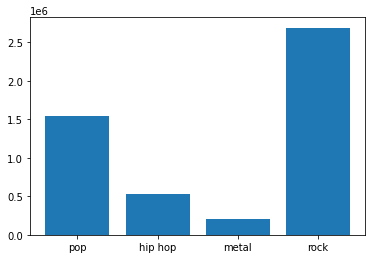

In [ ]:
import matplotlib.pyplot as plts
plts.bar(lables,counts)